# Data analysis

This notebook analysis the `coinmarketcap.csv`.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

import numpy as np
import pandas as pd

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = 15,6

In [3]:
# ingore warnings
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

## Import code from *data preprocessing* notebook

In [4]:
import ipynb.fs  # Boilerplate required
# only import definitions
from .defs.data_preprocessing import loadCoinMarketCap

## Load historical data into a dataframe

In [5]:
df = loadCoinMarketCap(
    # only consider coins having at least half a year of samples
    minSamples   = 180,
    minMarketCap = 1*1000*1000*1000, # 1 billion
    minVolume    = 1*1000*1000*1000, # 1 billion
)
# some constants
COL_VOLUME = "volume"
COL_MARKET = "marketcap"
COL_NAME   = "name"
COL_OPEN   = "open"
COL_CLOSE  = "close"
COL_HIGH   = "high"
COL_LOW    = "low"
print(df.head())
print("Currencies: {}".format(", ".join(df[COL_NAME].unique())))

Samples filled: 5
Loaded 14 currencies, 11469 samples.
               slug name    open    high     low   close  volume     marketcap
date                                                                          
2013-04-28  bitcoin  BTC  135.30  135.98  132.10  134.21     0.0  1.500520e+09
2013-04-29  bitcoin  BTC  134.44  147.49  134.00  144.54     0.0  1.491160e+09
2013-04-30  bitcoin  BTC  144.00  146.93  134.05  139.00     0.0  1.597780e+09
2013-05-01  bitcoin  BTC  139.00  139.89  107.72  116.99     0.0  1.542820e+09
2013-05-02  bitcoin  BTC  116.38  125.60   92.28  105.21     0.0  1.292190e+09
Currencies: BTC, ETH, XRP, BCH, LTC, XLM, NEO, MIOTA, ETC, QTUM, EOS, TRX, USDT, SNT


In [6]:
# we are not interested in USDT, so remove it
df = df.loc[df[COL_NAME] != "USDT"]

## Plot currencies

First, get all **close** prices into a data frame.

In [7]:
dfClose = pd.DataFrame()
for col in df[COL_NAME].unique():
    series = df.loc[(df[COL_NAME] == col)][COL_CLOSE]
    series.rename(col, inplace=True)
    dfTmp = series.to_frame()
    dfTmp.reset_index(inplace=True)
    dfClose = dfTmp if dfClose.empty else pd.merge(
                dfClose, dfTmp, on="date", how="outer", sort=True)
dfClose = dfClose.set_index("date")
# replace 0 with np.nan, so it is not plotted
dfClose = dfClose[:].replace(0, np.nan)

Finally plot the graphs.

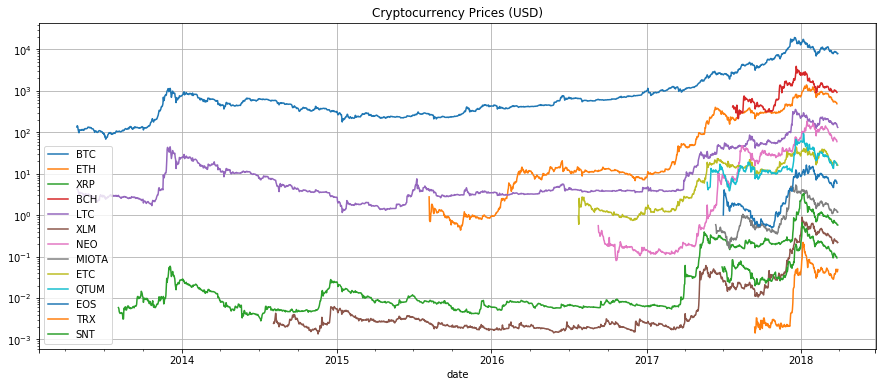

In [8]:
# plot for PDF printout
dfClose.plot(logy=True, grid=True)
plt.legend(loc="best")
plt.title("Cryptocurrency Prices (USD)")
pass

Calculate pearson correlation

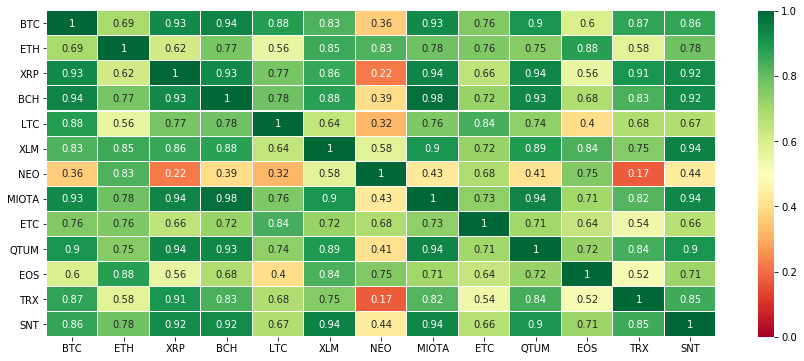

In [9]:
dfCorr = dfClose[dfClose.index.year >= 2018]
sns.heatmap(dfCorr.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)
pass